**Classifying Muffins and Cupcakes with SVM**

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Step 2:__ Import Data

In [22]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('/Users/danwang/Desktop/DSBA 6156 Applied Machine Learning/assignments/muffin-cupcake-master/recipes_muffins_cupcakes_scones.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

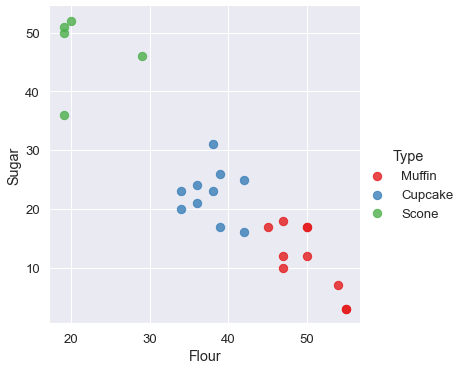

In [27]:
# Plot two ingredients
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [24]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].values
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [6]:
print (recipes[['Flour','Sugar']])

    Flour  Sugar
0      55      3
1      47     12
2      47     18
3      45     17
4      50     12
5      55      3
6      54      7
7      47     10
8      50     17
9      50     17
10     39     26
11     42     16
12     34     20
13     39     17
14     38     23
15     42     25
16     36     21
17     38     31
18     36     24
19     34     23


__Step 4:__ Fit the Model

In [25]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

__Step 5:__ Visualize Results

In [26]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

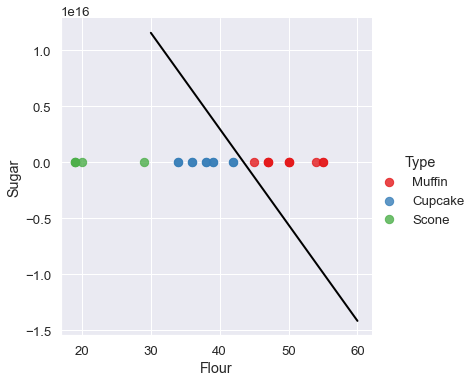

In [28]:
# Plot the hyperplane
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

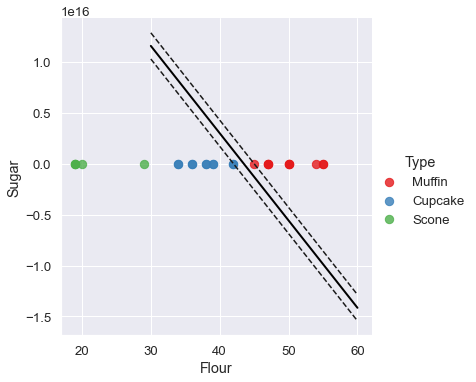

In [29]:
# Look at the margins and support vectors
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

__Step 6:__ Predict New Case

In [14]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [15]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


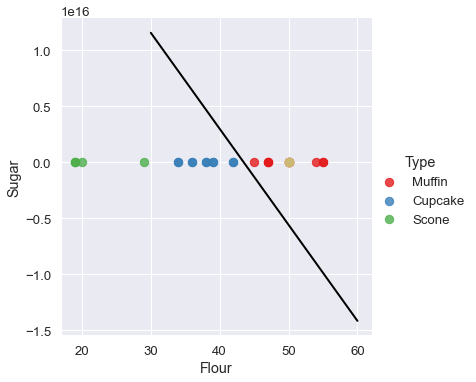

In [30]:
# Plot the point to visually see where the point lies
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [17]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [18]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [19]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [20]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [21]:
# S = String
pickle.dumps(muffin_cupcake_dict)

b'\x80\x04\x95\x8c\x05\x00\x00\x00\x00\x00\x00}\x94(\x8c\x14muffin_cupcake_model\x94\x8c\x14sklearn.svm._classes\x94\x8c\x03SVC\x94\x93\x94)\x81\x94}\x94(\x8c\x17decision_function_shape\x94\x8c\x03ovr\x94\x8c\nbreak_ties\x94\x89\x8c\x06kernel\x94\x8c\x06linear\x94\x8c\x06degree\x94K\x03\x8c\x05gamma\x94\x8c\x05scale\x94\x8c\x05coef0\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x03tol\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x02nu\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x07epsilon\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tshrinking\x94\x88\x8c\x0bprobability\x94\x89\x8c\ncache_size\x94K\xc8\x8c\x0cclass_weight\x94N\x8c\x07verbose\x94\x89\x8c\x08max_iter\x94J\xff\xff\xff\xff\x8c\x0crandom_state\x94N\x8c\x07_sparse\x94\x89\x8c\x0en_features_in_\x94K\x02\x8c\rclass_weight_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h!\x8c\x05dtype\x94\x93\x

In [33]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [37]:
from sklearn.tree import DecisionTreeClassifier
X = recipes ['Flour'] 
y = recipes ['Sugar']

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[55. 47. 47. 45. 50. 55. 54. 47. 50. 50. 39. 42. 34. 39. 38. 42. 36. 38.
 36. 34. 29. 19. 20. 19. 19.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.